In [108]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [140]:
mean_01 =[0.5,1.0]
mean_02 =[5.0,6.0]

cov_01=[[0.5,0.1],[0.1,0.5]]
cov_02=[[1.0,0.1],[0.1,1.0]]
dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

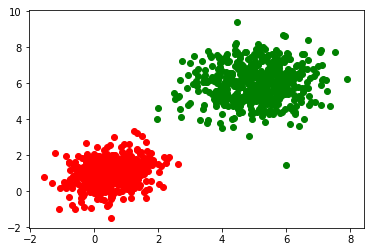

In [141]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()

In [142]:
rows = dist_01.shape[0]+dist_02.shape[0]
cols=dist_01.shape[1]+1

data=np.zeros((rows,cols))
data[:dist_01.shape[0],:2]=dist_01
data[dist_01.shape[0]:,:2]=dist_02
data[dist_01.shape[0]:,-1]=1.0
print data.shape

(1000L, 3L)


In [143]:
np.random.shuffle(data)
test_Data= data[:10]

In [144]:
def distance(p1,p2):
    d=np.sqrt(((p1-p2)**2).sum())
    return d

distance(np.array([1.0,1.0]),np.array([3.0,3.0]))

2.8284271247461903

In [145]:
def KNN(X_train, Y_train, xtest, k=5):
    vals=[]
    for ix in range(X_train.shape[0]):
        d=distance(X_train[ix],xtest)
        vals.append([d,Y_train[ix]])
        
    sorted_vals=sorted(vals, key=lambda z:z[0])
    neighbours=np.array(sorted_vals)[:k,-1]
    freq=np.unique(neighbours, return_counts=True)
    my_ans=freq[0][freq[1].argmax()]
    return my_ans

In [146]:
### dataset for input
X_train=test_Data[:,:2]
Y_train=test_Data[:,-1]
x_test=np.array([2.9,2.9])
k=3
ans=KNN(X_train,Y_train,x_test,3)
print ans

1.0


In [147]:
## Test and train split

split =int(0.75 * data.shape[0])

train_x=data[:split,:2]
train_y=data[:split,-1]

print np.unique(train_y,return_counts=True)

test_x=data[split:,:2]
test_y=data[split:,-1]

print train_x.shape
print train_y.shape


(array([0., 1.]), array([382, 368], dtype=int64))
(750L, 2L)
(750L,)


In [150]:
def get_acc(kx,x_train,x_test,y_train,y_test):
    preds=[]
    for ix in range(x_test.shape[0]):
        label=KNN(x_train,y_train,x_test[ix],k=kx)
        preds.append(label)
    preds=np.array(preds)
    return 100*float((preds==y_test).sum())/y_test.shape[0]

In [151]:
get_acc(1,train_x,test_x,train_y,test_y)

100.0